In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Params import *
from Utils import *
from Abstraction import SymbolicAbstraction
from Controller import SymbolicController

In [2]:
myAbs = SymbolicAbstraction(f, Jf_x, Jf_w)
myAbs.Start()

# myAbs.Load("SymbolicAbstraction.csv") # Load the abstraction from a file

Computing symbolic model...
Reachable state-input pairks: 3991700


In [6]:
myAbs.Save("SymbolicAbstraction.csv") # Save the abstraction to a file

Symbolic model 'g' saved to SymbolicAbstraction.csv.


In [3]:
Control = SymbolicController(myAbs)
V_result, h2_result = Control.Start()

# Load the controller from a file: 
# Control.Load()  
# V_result, h2_result = Control.V, Control.h2

Fixed-point algorithm reached convergence.

Controller Coverage: 630084/1500000 states


In [5]:
# Save the controller to a file:
Control.Save()

[5 1 0]
[0 8 0]
[2 7 0]
[4 9 0]
[9 6 0]
[4 2 0]
[9 8 0]
[4 1 0]
[8 0 0]
[8 2 0]


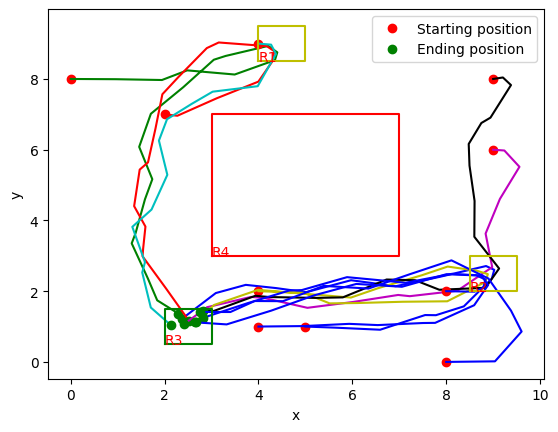

In [4]:
import random
lab = Control.labelingXi

plt.figure()

robotNum = 10
uniqcolors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] # visually appealing colors for each robot
# if robots ran out of colors the rest will be blue


for i in range(robotNum):
    legend = (i==0) # Not to spam the legend box

    #Spawn robots in a random position
    x = np.array([random.randint(0, 9), random.randint(0, 9), 0])


    # If it spawns in R4 it's not interesting
    if x[0] >= R4[0, 0] and x[0] <= R4[0, 1] and x[1] >= R4[1, 0] and x[1] <= R4[1, 1]:
        continue
    

    #This condition is just not to spam the legend box
    if legend:
        plt.plot(x[0], x[1], 'ro', label="Starting position")
    else: 
        plt.plot(x[0], x[1], 'ro')

    print(x)

    psi = I_s
    z = x  
    Tx = [x]

    try: 
            
        for i in range(100):
            psi = h1(psi, q(x), lab)

            if psi == F_s[0]:
                break

            u = myAbs.ControlDisc[:, int(h2_result[psi - 1, q(x)]) - 1]
            w = bound_w[:, 0] + np.random.rand(3) * (bound_w[:, 1] - bound_w[:, 0])

            x = f(x, u, w)
            z = f(z, u, w)

            if x[2] > np.pi:
                x[2] -= 2 * np.pi
            elif x[2] < -np.pi:
                x[2] += 2 * np.pi
            
            Tx.append(z)

        chosenColor = uniqcolors.pop(0) if len(uniqcolors) > 0 else 'b'

        plt.plot([x[0] for x in Tx], [x[1] for x in Tx], f'{chosenColor}-')


        # Again, not to spam the legend box
        if legend:
            plt.plot(x[0], x[1], 'go', label="Ending position")
        else: 
            plt.plot(x[0], x[1], 'go')
    
    except: 
        pass



plt.plot(R1[0, [0, 1, 1, 0, 0]], R1[1, [0, 0, 1, 1, 0]], 'y-')
plt.plot(R2[0, [0, 1, 1, 0, 0]], R2[1, [0, 0, 1, 1, 0]], 'y-')
plt.plot(R3[0, [0, 1, 1, 0, 0]], R3[1, [0, 0, 1, 1, 0]], 'g-')
plt.plot(R4[0, [0, 1, 1, 0, 0]], R4[1, [0, 0, 1, 1, 0]], 'r-')


for i, region in enumerate([R1, R2, R3, R4]):
    plt.text(region[0, 0], region[1, 0], f"R{i+1}", color='r')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()